Import all modules:

In [1]:
import drp_template.input_output as io
from drp_template.image import plot_histogram as plt_hist

Set parameters for import uint16.raw:

In [2]:
file_path = '../examples/data/raw_100cube.raw'
dimensions = {'nz': 100, 'ny': 100, 'nx': 100}
data_raw = io.import_model(file_path=file_path, dtype='uint16', dimensions=dimensions)

Parameters filename: raw_100cube.json
Reshaping data to the desired order (nx, ny, nz)...
Dimensions: 3
nx: 100
ny: 100
nz: 100


Plot histogram for uint16.raw:

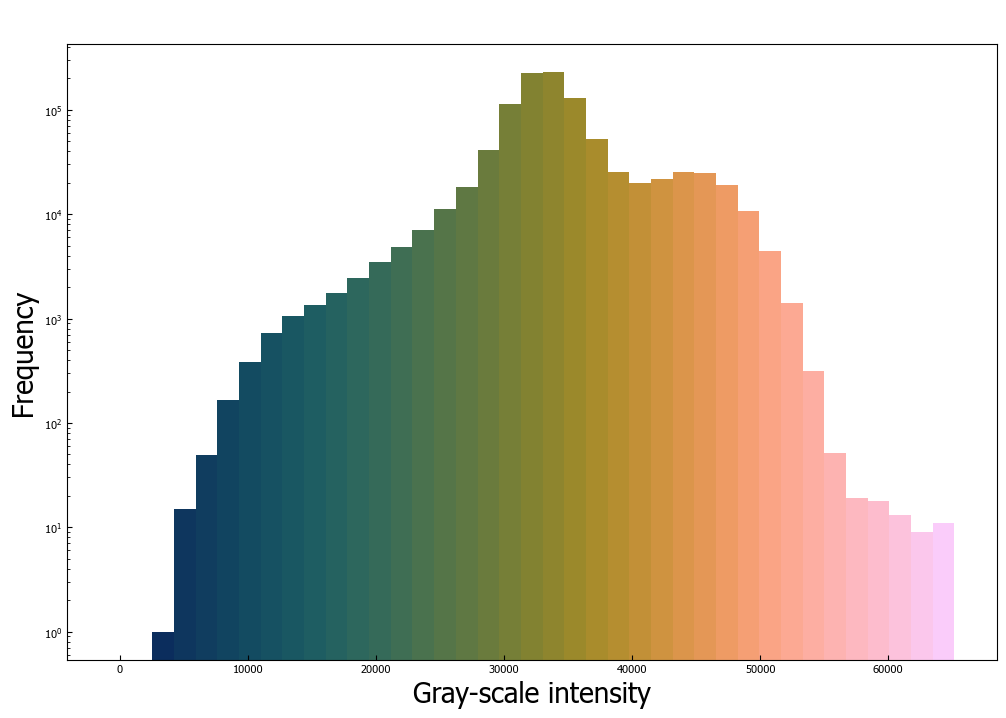

In [3]:
fig, ax = plt_hist(data_raw)